# CODE

## Intial Code

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [201]:
df = pd.read_csv('time_series_dataset.csv')



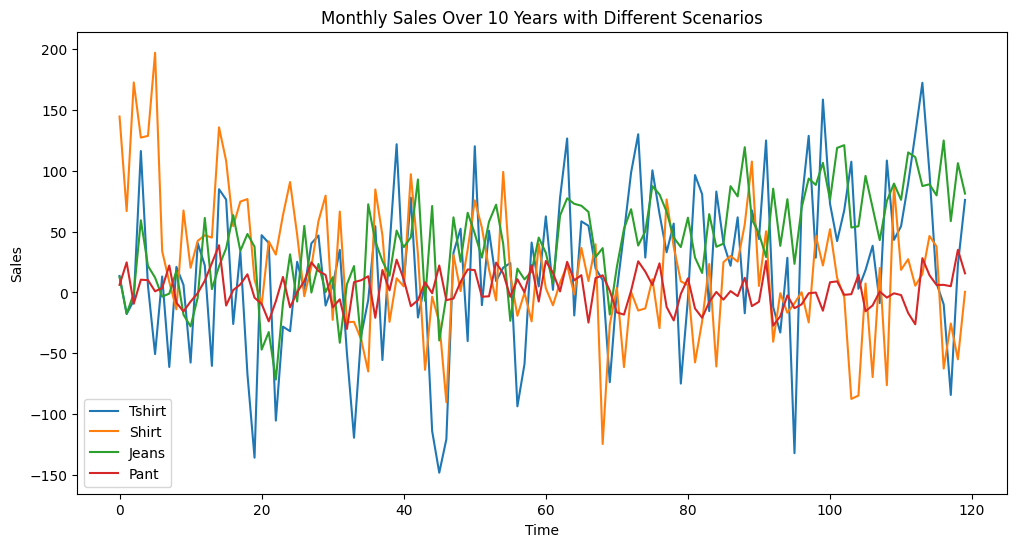

In [202]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Tshirt'], label='Tshirt')
plt.plot(df.index, df['Shirt'], label='Shirt')
plt.plot(df.index, df['Jeans'], label='Jeans')
plt.plot(df.index, df['Pant'], label='Pant')
plt.title('Monthly Sales Over 10 Years with Different Scenarios')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

## T-Shirt

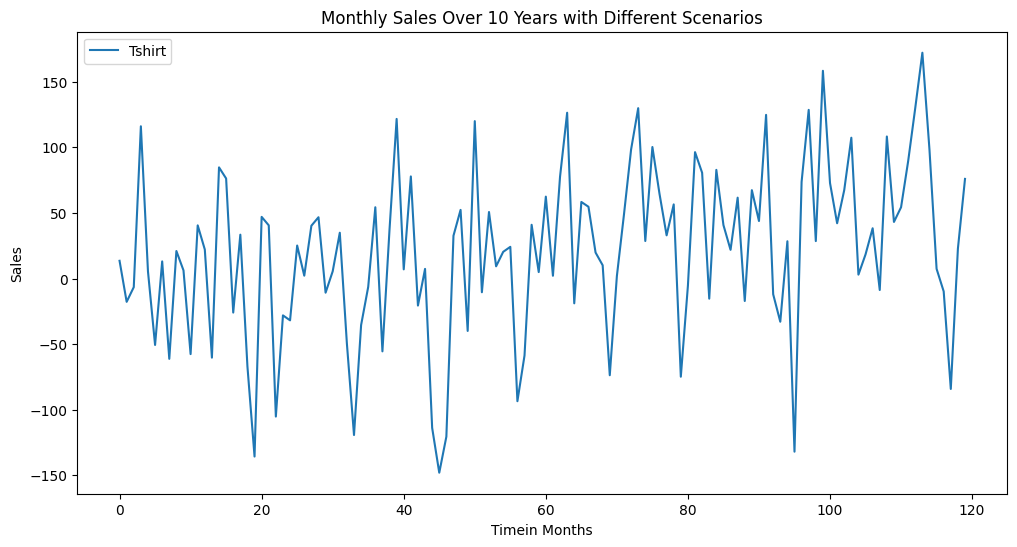

In [203]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Tshirt'], label='Tshirt')
plt.title('Monthly Sales Over 10 Years with Different Scenarios')
plt.xlabel('Timein Months')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [204]:
tshirt_data = df['Tshirt']
result = seasonal_decompose(tshirt_data, model='additive', period=12)

### Original

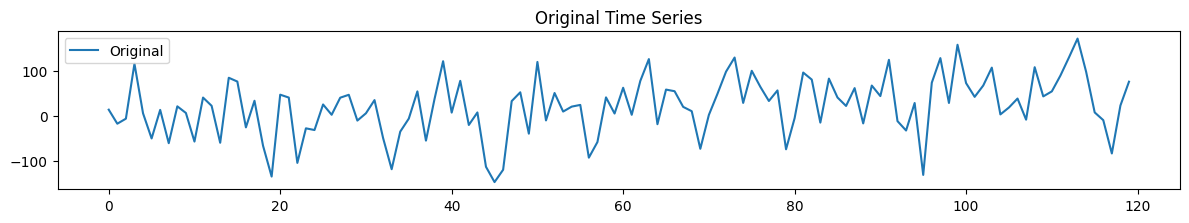

In [205]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(tshirt_data, label='Original')
plt.legend()
plt.title('Original Time Series')
plt.tight_layout()
plt.show()

### Trend

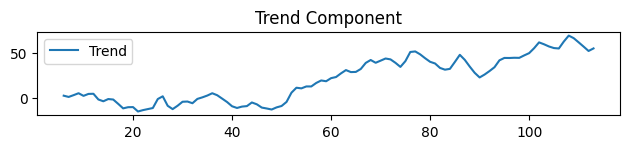

In [206]:
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.show()

### Seasonal

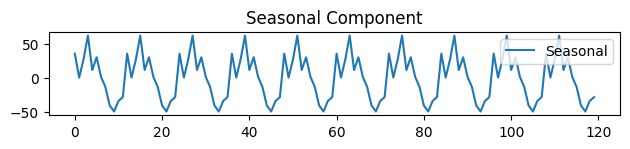

In [207]:
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

### Residualualual

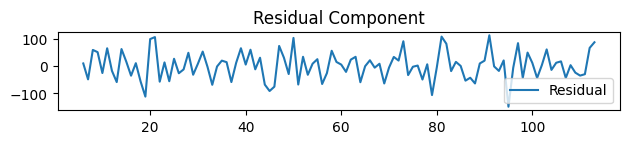

In [208]:
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

### Forecast Exponential Smoothing

In [209]:

train_size = int(len(tshirt_data) * 0.8)  # Use 80% of the data for training
train0_1, test0_1 = tshirt_data[:train_size], tshirt_data[train_size:]

In [210]:
model = ExponentialSmoothing(train0_1, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model = model.fit()

In [211]:
forecast_values = fit_model.forecast(steps=len(test0_1))

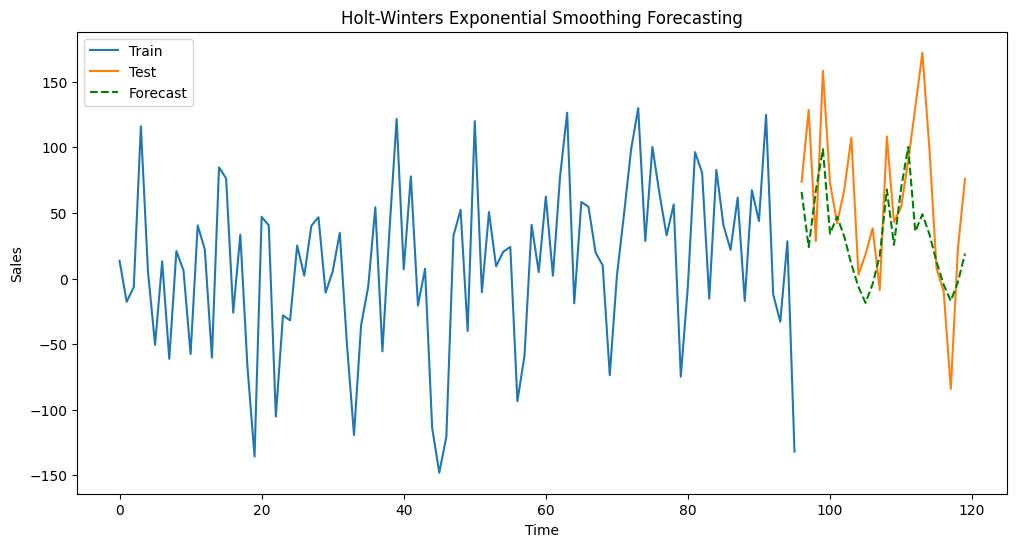

In [212]:
plt.figure(figsize=(12, 6))
plt.plot(train0_1.index, train0_1, label='Train')
plt.plot(test0_1.index, test0_1, label='Test')
plt.plot(test0_1.index, forecast_values, label='Forecast', linestyle='--', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Error

In [213]:
# Calculate Mean Absolute Error (MAE)
mae0_1 = mean_absolute_error(test0_1, forecast_values)
print(f"Mean Absolute Error (MAE): {mae0_1}")

# Calculate Mean Squared Error (MSE)
mse0_1 = mean_squared_error(test0_1, forecast_values)
print(f"Mean Squared Error (MSE): {mse0_1}")

rmse0_1 = np.sqrt(mse0_1)
print(f"Root Mean Squared Error (RMSE): {rmse0_1}")

Mean Absolute Error (MAE): 42.7130981776587
Mean Squared Error (MSE): 2955.7303337397293
Root Mean Squared Error (RMSE): 54.366628861276006


### Forecast Moving Average

In [214]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma = tshirt_data.rolling(window=window_size).mean()


In [215]:
train_size = int(len(tshirt_data) * 0.8)  # Use 80% of the data for training
train0_2, test0_2 = tshirt_data[:train_size], tshirt_data[train_size:]

In [295]:
window_size = 3  # Adjust the window size as needed
sma = tshirt_data.rolling(window=window_size).mean()
forecast_values_sma_0 = sma[train_size:]

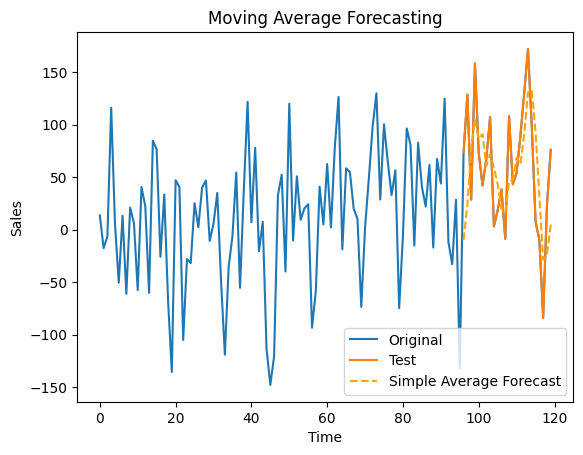

In [296]:

plt.plot(tshirt_data, label='Original')
plt.plot(test0_2.index, test0_2, label='Test')
plt.plot(test0_2.index, forecast_values_sma_0, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Moving Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [297]:
# Calculate Mean Absolute Error (MAE)
mae0_2 = mean_absolute_error(test0_2, forecast_values_sma_0)
print(f"Mean Absolute Error (MAE): {mae0_2}")

# Calculate Mean Squared Error (MSE)
mse0_2 = mean_squared_error(test0_2, forecast_values_sma_0)
print(f"Mean Squared Error (MSE): {mse0_2}")

rmse0_2 = np.sqrt(mse0_2)
print(f"Root Mean Squared Error (RMSE): {rmse0_2}")

Mean Absolute Error (MAE): 43.421725976443724
Mean Squared Error (MSE): 2515.3470772669684
Root Mean Squared Error (RMSE): 50.15323596007508


### Forecast Simple Average

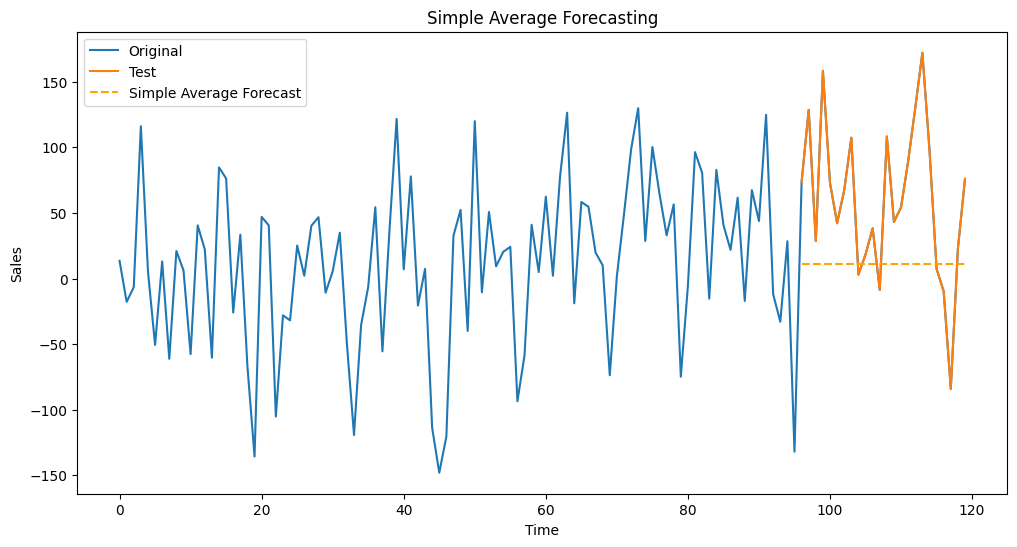

In [220]:
train_size = int(len(tshirt_data) * 0.8)  # Use 80% of the data for training
train0_3, test0_3= tshirt_data[:train_size], tshirt_data[train_size:]
# Calculate Simple Average
simple_average = train0_3.mean()

# Repeat the simple average for the length of the test set
forecast_values_simple_average_0 = pd.Series([simple_average] * len(test0_3), index=test0_3.index)

# Plot the original time series, test set, and Simple Average forecast
plt.figure(figsize=(12, 6))
plt.plot(tshirt_data, label='Original')
plt.plot(test0_3.index, test0_3, label='Test')
plt.plot(test0_3.index, forecast_values_simple_average_0, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Simple Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Error

In [221]:
# Calculate Mean Absolute Error (MAE)
mae0_3 = mean_absolute_error(test0_3, forecast_values_simple_average_0)
print(f"Mean Absolute Error (MAE): {mae0_3}")

# Calculate Mean Squared Error (MSE)
mse0_3 = mean_squared_error(test0_3, forecast_values_simple_average_0)
print(f"Mean Squared Error (MSE): {mse0_3}")

rmse0_3 = np.sqrt(mse0_3)
print(f"Root Mean Squared Error (RMSE): {rmse0_3}")

Mean Absolute Error (MAE): 61.233500460535005
Mean Squared Error (MSE): 5776.38976074638
Root Mean Squared Error (RMSE): 76.00256417218027


### Graphs Representation

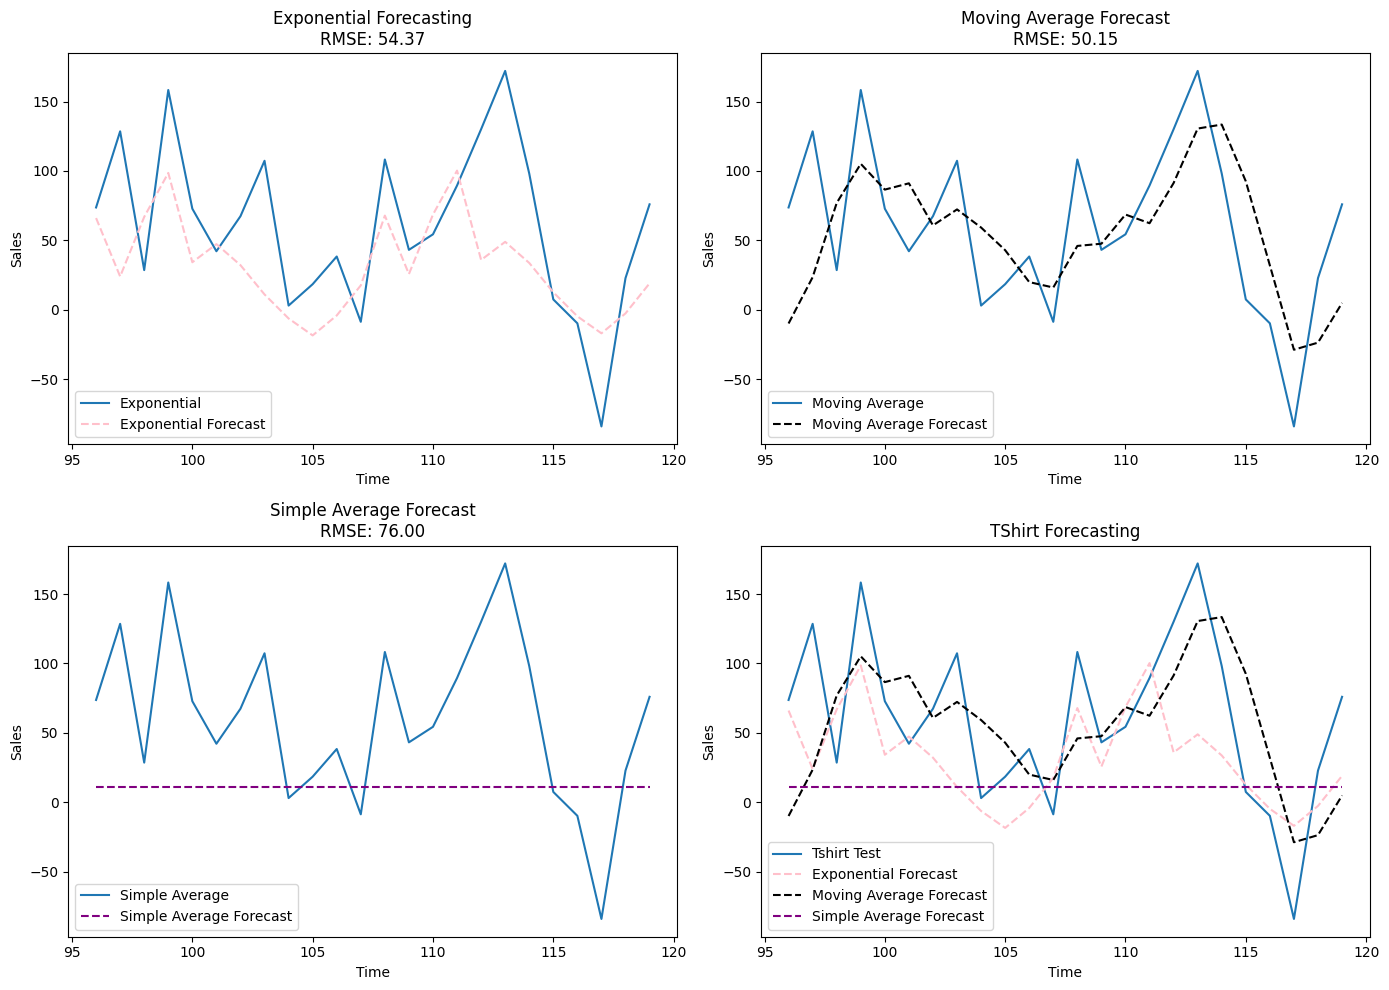

In [222]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test0_1.index, test0_1, label='Exponential')
axes[0, 0].plot(test0_1.index, forecast_values, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE: {:.2f}'.format(rmse0_1))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Moving
axes[0, 1].plot(test0_2.index, test0_2, label='Moving Average')
axes[0, 1].plot(test0_2.index, forecast_values_sma_0, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE: {:.2f}'.format(rmse0_2))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Simple
axes[1, 0].plot(test0_3.index, test0_3, label='Simple Average')
axes[1, 0].plot(test0_3.index, forecast_values_simple_average_0, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Simple Average Forecast\nRMSE: {:.2f}'.format(rmse0_3))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test0_1.index, test0_1, label='Tshirt Test')
axes[1, 1].plot(test0_1.index, forecast_values, label='Exponential Forecast', linestyle='--', color='pink')
axes[1, 1].plot(test0_2.index, forecast_values_sma_0, label='Moving Average Forecast', linestyle='--', color='black')
axes[1, 1].plot(test0_3.index, forecast_values_simple_average_0, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 1].set_title('TShirt Forecasting')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Shirt

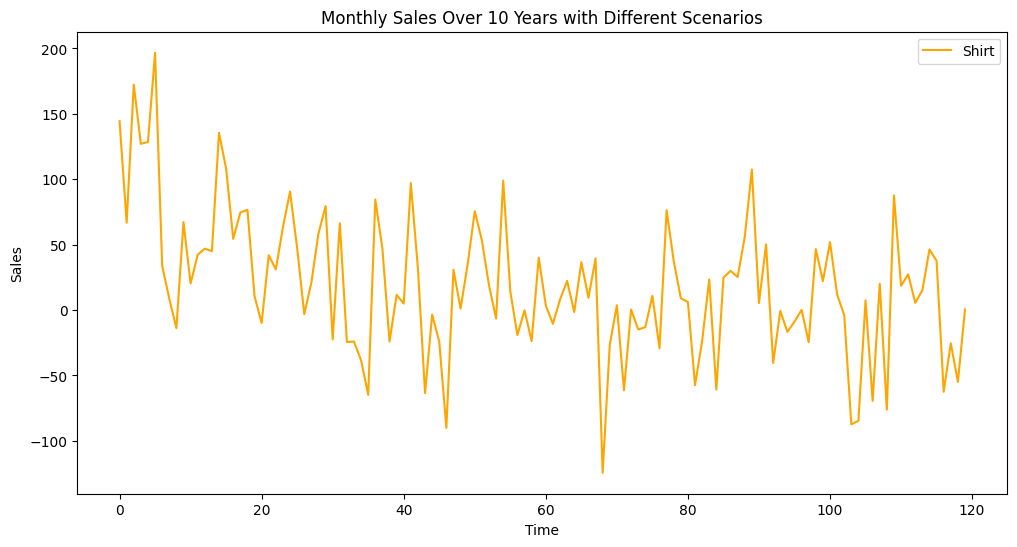

In [223]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Shirt'], label='Shirt',color='orange')
plt.title('Monthly Sales Over 10 Years with Different Scenarios')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [224]:
shirt_data = df['Shirt']
result1 = seasonal_decompose(tshirt_data, model='additive', period=12)

### Original

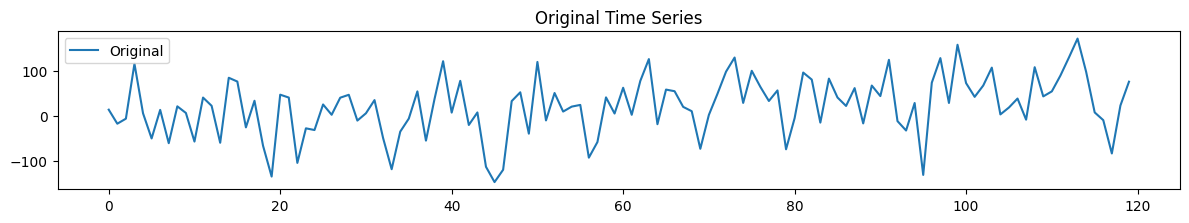

In [225]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(tshirt_data, label='Original')
plt.legend()
plt.title('Original Time Series')
plt.tight_layout()
plt.show()

### Trend

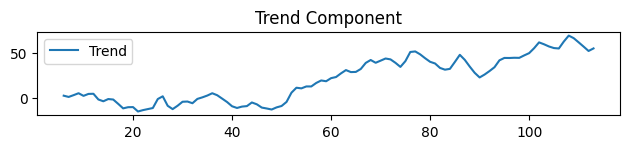

In [226]:
plt.subplot(4, 1, 2)
plt.plot(result1.trend, label='Trend')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.show()

### Seasonal

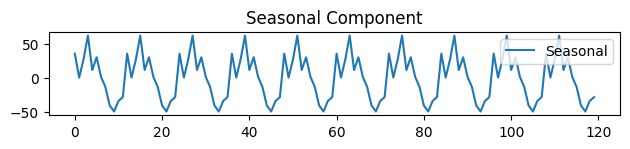

In [227]:
plt.subplot(4, 1, 3)
plt.plot(result1.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

### Residual

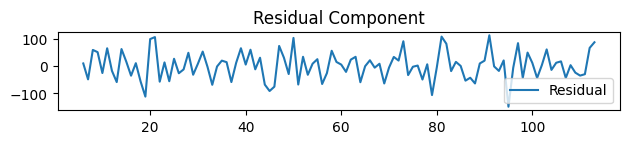

In [228]:
plt.subplot(4, 1, 4)
plt.plot(result1.resid, label='Residual')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

### Forecast Exponential Smoothing

In [229]:
train_size = int(len(shirt_data) * 0.8)  # Use 80% of the data for training
train1_1, test1_1 = shirt_data[:train_size], shirt_data[train_size:]

In [230]:
model = ExponentialSmoothing(train1_1, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model = model.fit()

In [231]:
forecast_values1 = fit_model.forecast(steps=len(test1_1))

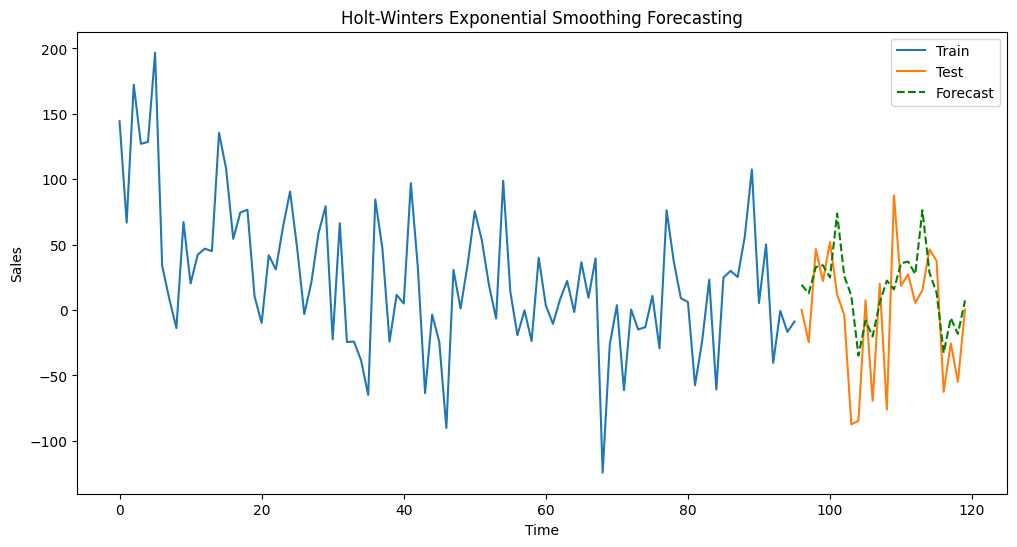

In [232]:
plt.figure(figsize=(12, 6))
plt.plot(train1_1.index, train1_1, label='Train')
plt.plot(test1_1.index, test1_1, label='Test')
plt.plot(test1_1.index, forecast_values1, label='Forecast', linestyle='--', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Error

In [233]:
# Calculate Mean Absolute Error (MAE)
mae1_1 = mean_absolute_error(test1_1, forecast_values1)
print(f"Mean Absolute Error (MAE): {mae1_1}")

# Calculate Mean Squared Error (MSE)
mse1_1 = mean_squared_error(test1_1, forecast_values1)
print(f"Mean Squared Error (MSE): {mse1_1}")

rmse1_1 = np.sqrt(mse1_1)
print(f"Root Mean Squared Error (RMSE): {rmse1_1}")

Mean Absolute Error (MAE): 35.18731382632842
Mean Squared Error (MSE): 1903.4866671704447
Root Mean Squared Error (RMSE): 43.62896591910522


### Forecast Moving Average

In [234]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma = shirt_data.rolling(window=window_size).mean()


In [235]:
train_size = int(len(shirt_data) * 0.8)  # Use 80% of the data for training
train1_2, test1_2 = shirt_data[:train_size], shirt_data[train_size:]

In [236]:
window_size = 3  # Adjust the window size as needed
sma = shirt_data.rolling(window=window_size).mean()
forecast_values_sma_1 = sma[train_size:]

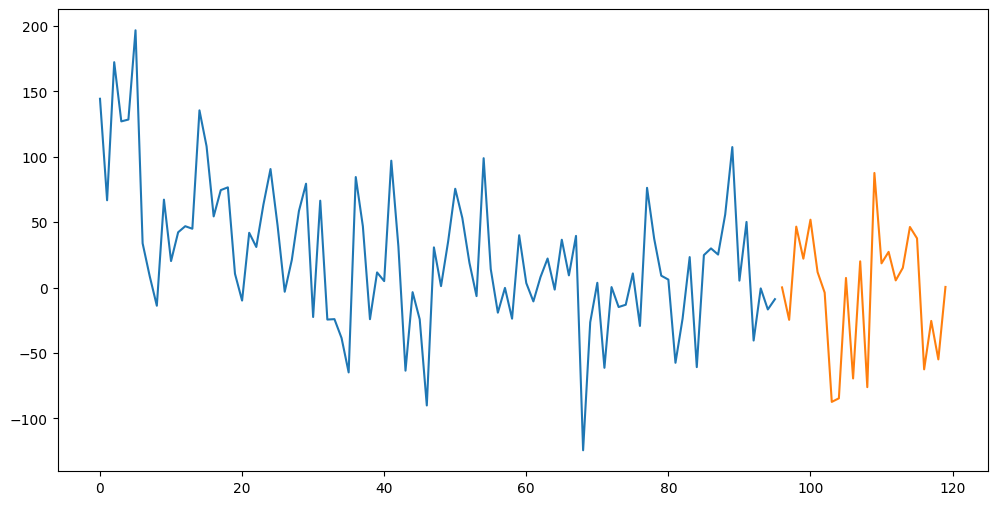

In [237]:
plt.figure(figsize=(12, 6))
plt.plot(train1_2.index, train1_2, label='Train')
plt.plot(test1_2.index, test1_2, label='Test')

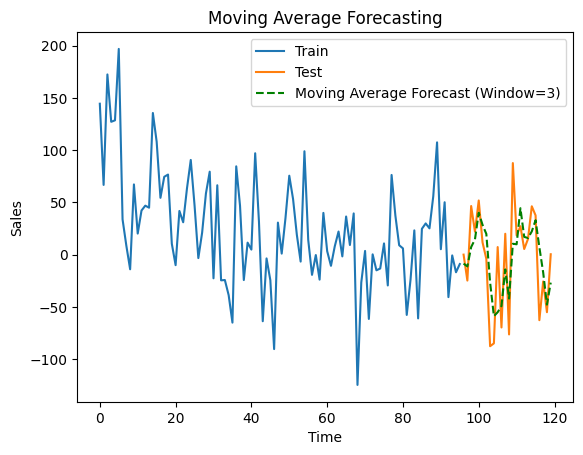

In [238]:

plt.plot(train1_2.index, train1_2, label='Train')
plt.plot(test1_2.index, test1_2, label='Test')
plt.plot(test1_2.index, forecast_values_sma_1, label=f'Moving Average Forecast (Window={window_size})', linestyle='--', color='green')

plt.title('Moving Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [239]:
# Calculate Mean Absolute Error (MAE)
mae1_2 = mean_absolute_error(test1_2, forecast_values_sma_1)
print(f"Mean Absolute Error (MAE): {mae1_2}")

# Calculate Mean Squared Error (MSE)
mse1_2 = mean_squared_error(test1_2, forecast_values_sma_1)
print(f"Mean Squared Error (MSE): {mse1_2}")

rmse1_2 = np.sqrt(mse1_2)
print(f"Root Mean Squared Error (RMSE): {rmse1_2}")

Mean Absolute Error (MAE): 25.666847814632234
Mean Squared Error (MSE): 1109.832454349081
Root Mean Squared Error (RMSE): 33.31414796072505


### Forecast Simple Average

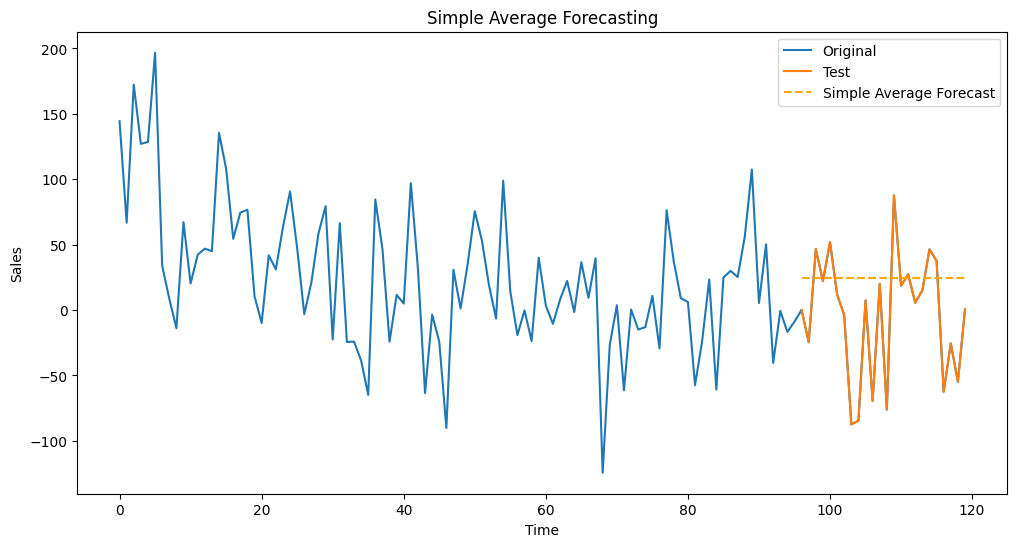

In [240]:
train_size = int(len(shirt_data) * 0.8)  # Use 80% of the data for training
train1_3, test1_3= shirt_data[:train_size], shirt_data[train_size:]
# Calculate Simple Average
simple_average = train1_3.mean()

# Repeat the simple average for the length of the test set
forecast_values_simple_average_1 = pd.Series([simple_average] * len(test1_3), index=test1_3.index)

# Plot the original time series, test set, and Simple Average forecast
plt.figure(figsize=(12, 6))
plt.plot(shirt_data, label='Original')
plt.plot(test1_3.index, test1_3, label='Test')
plt.plot(test1_3.index, forecast_values_simple_average_1, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Simple Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Error

In [241]:
# Calculate Mean Absolute Error (MAE)
mae1_3 = mean_absolute_error(test1_3, forecast_values_simple_average_1)
print(f"Mean Absolute Error (MAE): {mae1_3}")

# Calculate Mean Squared Error (MSE)
mse1_3 = mean_squared_error(test1_3, forecast_values_simple_average_1)
print(f"Mean Squared Error (MSE): {mse1_3}")

rmse1_3 = np.sqrt(mse1_3)
print(f"Root Mean Squared Error (RMSE): {rmse1_3}")

Mean Absolute Error (MAE): 40.75490178912447
Mean Squared Error (MSE): 2953.24012362706
Root Mean Squared Error (RMSE): 54.343722025888695


### Graphs Representation

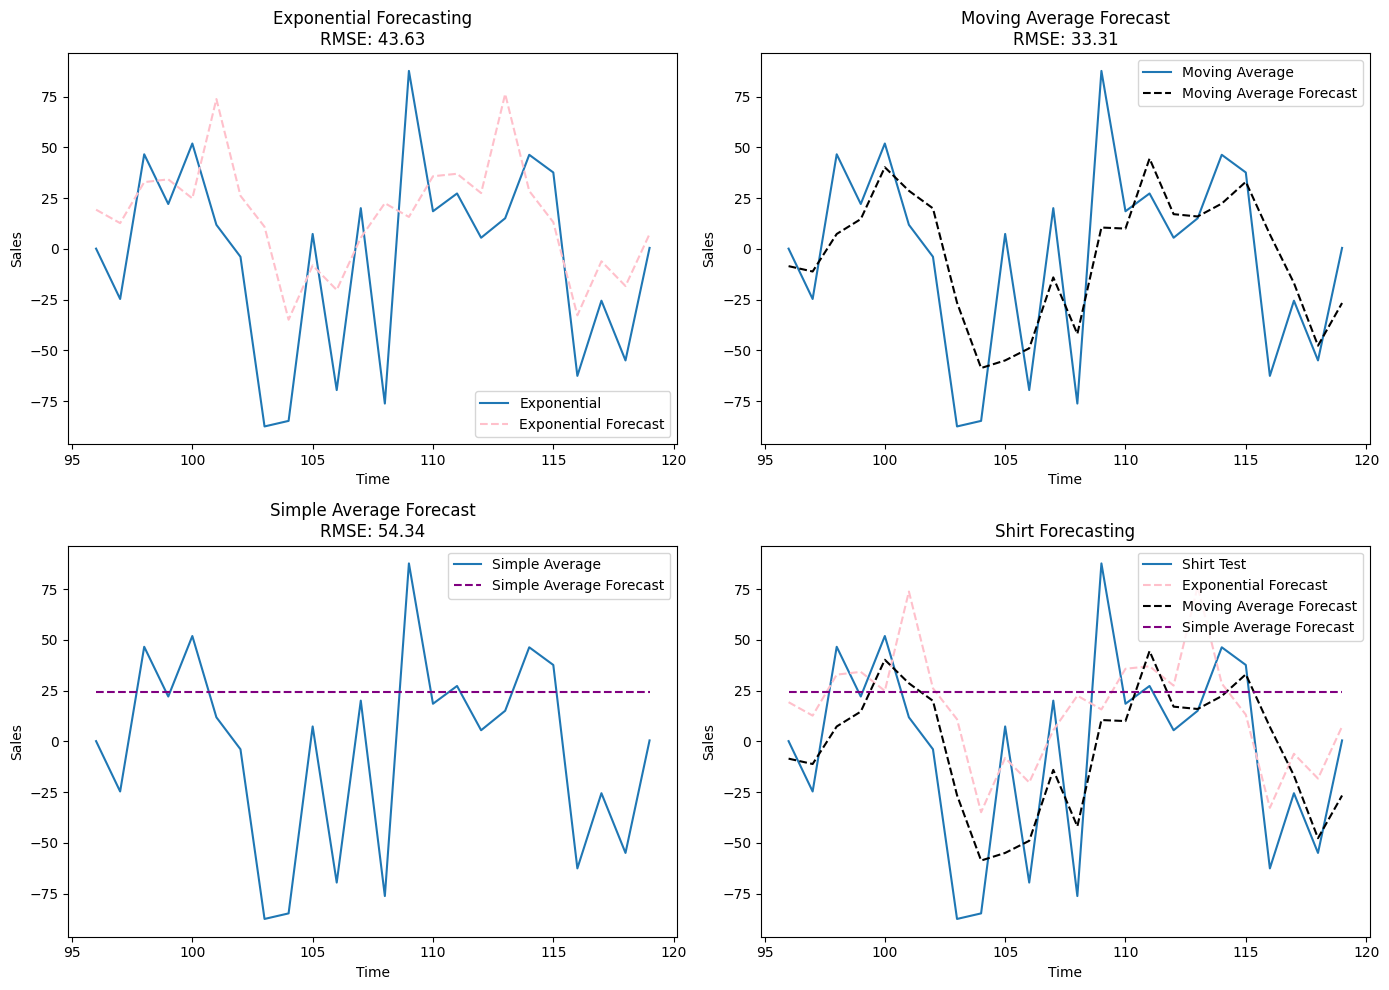

In [242]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test1_1.index, test1_1, label='Exponential')
axes[0, 0].plot(test1_1.index, forecast_values1, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE: {:.2f}'.format(rmse1_1))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Shirt
axes[0, 1].plot(test1_2.index, test1_2, label='Moving Average')
axes[0, 1].plot(test1_2.index, forecast_values_sma_1, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE: {:.2f}'.format(rmse1_2))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Jeans
axes[1, 0].plot(test1_3.index, test1_3, label='Simple Average')
axes[1, 0].plot(test1_3.index, forecast_values_simple_average_1, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Simple Average Forecast\nRMSE: {:.2f}'.format(rmse1_3))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test1_1.index, test1_1, label='Shirt Test')
axes[1, 1].plot(test1_1.index, forecast_values1, label='Exponential Forecast', linestyle='--', color='pink')
axes[1, 1].plot(test1_2.index, forecast_values_sma_1, label='Moving Average Forecast', linestyle='--', color='black')
axes[1, 1].plot(test1_3.index, forecast_values_simple_average_1, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 1].set_title('Shirt Forecasting')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Jeans

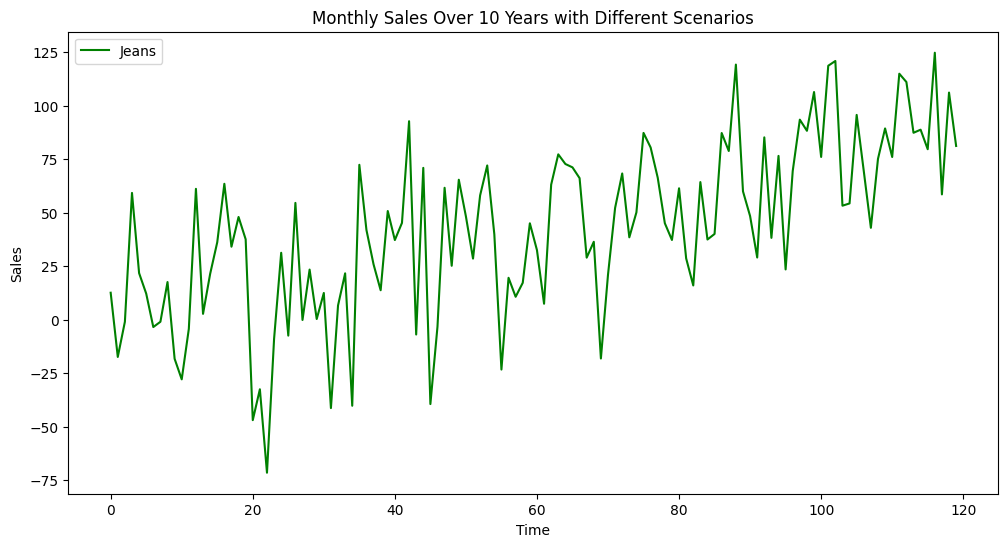

In [243]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Jeans'], label='Jeans',color='green')
plt.title('Monthly Sales Over 10 Years with Different Scenarios')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [244]:
jeans_data = df['Jeans']
result2 = seasonal_decompose(jeans_data, model='additive', period=12)

### Original

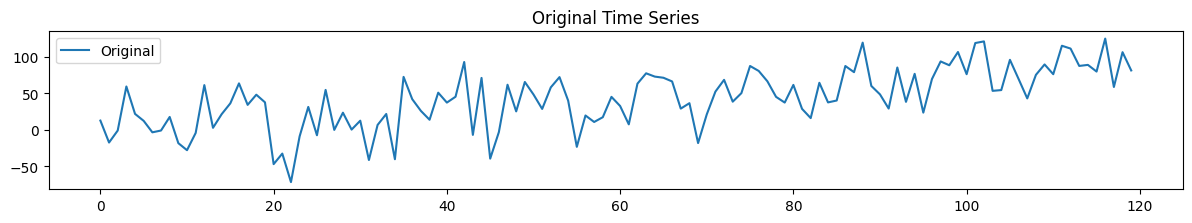

In [245]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(jeans_data, label='Original')
plt.legend()
plt.title('Original Time Series')
plt.tight_layout()
plt.show()

### Trend

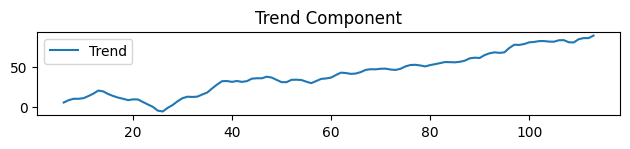

In [246]:
plt.subplot(4, 1, 2)
plt.plot(result2.trend, label='Trend')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.show()

### Seasonal

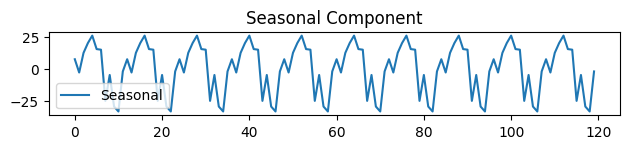

In [247]:
plt.subplot(4, 1, 3)
plt.plot(result2.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

### Noise

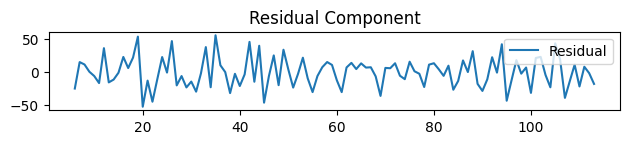

In [248]:
plt.subplot(4, 1, 4)
plt.plot(result2.resid, label='Residual')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

### Forecast Exponential Smoothing

In [249]:
train_size = int(len(jeans_data) * 0.8)  # Use 80% of the data for training
train2_1, test2_1 = jeans_data[:train_size], jeans_data[train_size:]

In [250]:
model = ExponentialSmoothing(train2_1, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model = model.fit()

In [251]:
forecast_values2 = fit_model.forecast(steps=len(test2_1))

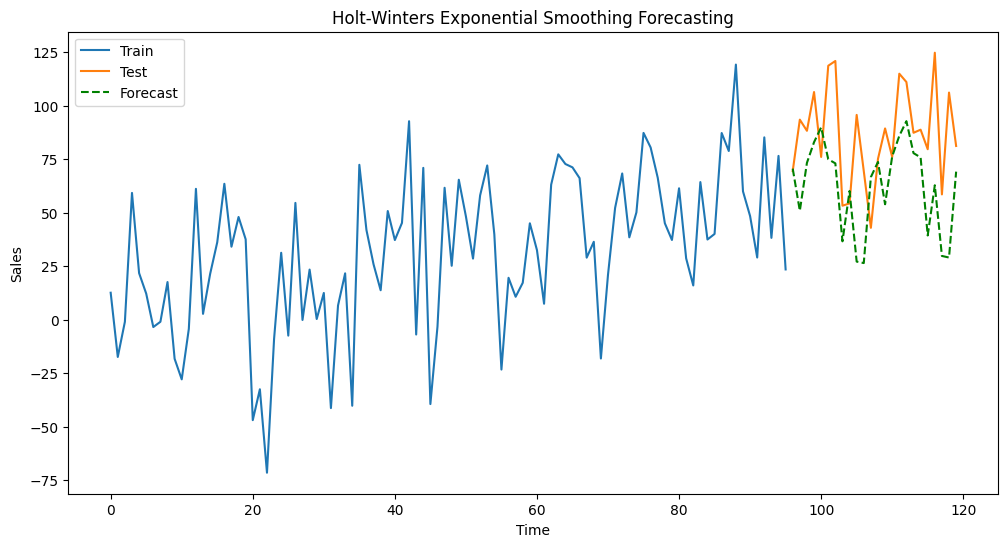

In [252]:
plt.figure(figsize=(12, 6))
plt.plot(train2_1.index, train2_1, label='Train')
plt.plot(test2_1.index, test2_1, label='Test')
plt.plot(test2_1.index, forecast_values2, label='Forecast', linestyle='--', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Error

In [253]:
# Calculate Mean Absolute Error (MAE)
mae2_1 = mean_absolute_error(test2_1, forecast_values2)
print(f"Mean Absolute Error (MAE): {mae2_1}")

# Calculate Mean Squared Error (MSE)
mse2_1 = mean_squared_error(test2_1, forecast_values2)
print(f"Mean Squared Error (MSE): {mse2_1}")

rmse2_1 = np.sqrt(mse2_1)
print(f"Root Mean Squared Error (RMSE): {rmse2_1}")

Mean Absolute Error (MAE): 28.0066869689479
Mean Squared Error (MSE): 1227.6404598371425
Root Mean Squared Error (RMSE): 35.03770055008094


### Forecast Moving Average

In [254]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma = shirt_data.rolling(window=window_size).mean()


In [255]:
train_size = int(len(jeans_data) * 0.8)  # Use 80% of the data for training
train2_2, test2_2 = jeans_data[:train_size], jeans_data[train_size:]

In [256]:
window_size = 3  # Adjust the window size as needed
sma = jeans_data.rolling(window=window_size).mean()
forecast_values_sma_2 = sma[train_size:]

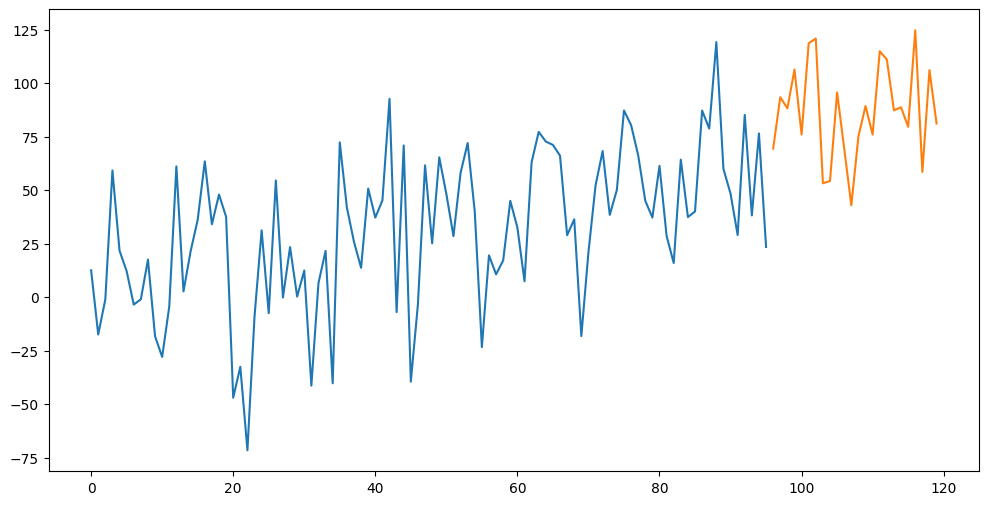

In [257]:
plt.figure(figsize=(12, 6))
plt.plot(train2_2.index, train2_2, label='Train')
plt.plot(test2_2.index, test2_2, label='Test')

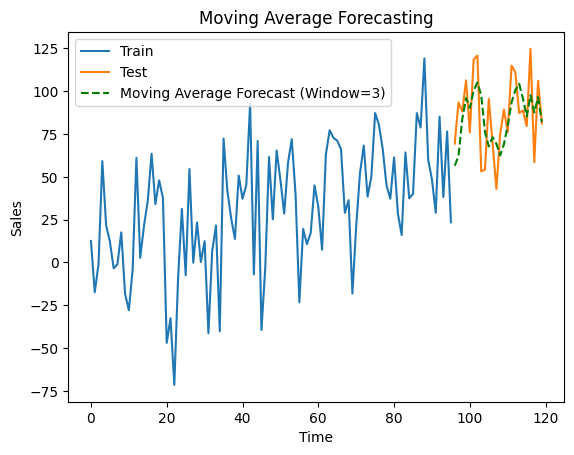

In [258]:

plt.plot(train2_2.index, train2_2, label='Train')
plt.plot(test2_2.index, test2_2, label='Test')
plt.plot(test2_2.index, forecast_values_sma_2, label=f'Moving Average Forecast (Window={window_size})', linestyle='--', color='green')

plt.title('Moving Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [259]:
# Calculate Mean Absolute Error (MAE)
mae2_2 = mean_absolute_error(test2_2, forecast_values_sma_2)
print(f"Mean Absolute Error (MAE): {mae2_2}")

# Calculate Mean Squared Error (MSE)
mse2_2 = mean_squared_error(test2_2, forecast_values_sma_2)
print(f"Mean Squared Error (MSE): {mse2_2}")

rmse2_2 = np.sqrt(mse2_2)
print(f"Root Mean Squared Error (RMSE): {rmse2_2}")

Mean Absolute Error (MAE): 16.527585768578486
Mean Squared Error (MSE): 383.06059382612125
Root Mean Squared Error (RMSE): 19.571933829494757


### Forecast Simple Average

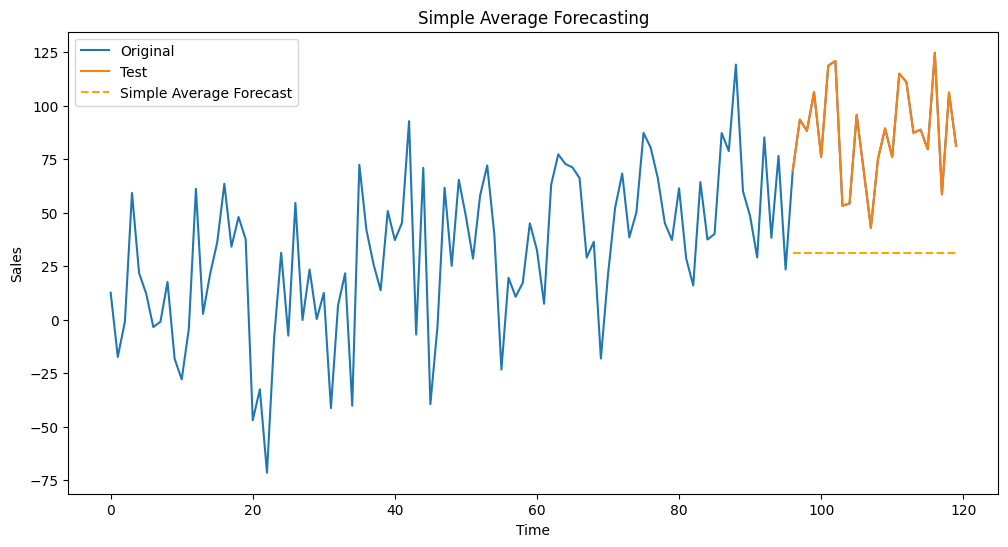

In [260]:
train_size = int(len(jeans_data) * 0.8)  # Use 80% of the data for training
train2_3, test2_3= jeans_data[:train_size], jeans_data[train_size:]
# Calculate Simple Average
simple_average = train2_3.mean()

# Repeat the simple average for the length of the test set
forecast_values_simple_average_2 = pd.Series([simple_average] * len(test2_3), index=test2_3.index)

# Plot the original time series, test set, and Simple Average forecast
plt.figure(figsize=(12, 6))
plt.plot(jeans_data, label='Original')
plt.plot(test2_3.index, test2_3, label='Test')
plt.plot(test2_3.index, forecast_values_simple_average_2, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Simple Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Error

In [261]:
# Calculate Mean Absolute Error (MAE)
mae2_3 = mean_absolute_error(test2_3, forecast_values_simple_average_2)
print(f"Mean Absolute Error (MAE): {mae2_3}")

# Calculate Mean Squared Error (MSE)
mse2_3 = mean_squared_error(test2_3, forecast_values_simple_average_2)
print(f"Mean Squared Error (MSE): {mse2_3}")

rmse2_3 = np.sqrt(mse2_3)
print(f"Root Mean Squared Error (RMSE): {rmse2_3}")

Mean Absolute Error (MAE): 55.447565743591575
Mean Squared Error (MSE): 3567.9294700362807
Root Mean Squared Error (RMSE): 59.73214770989137


### Graphs Representation

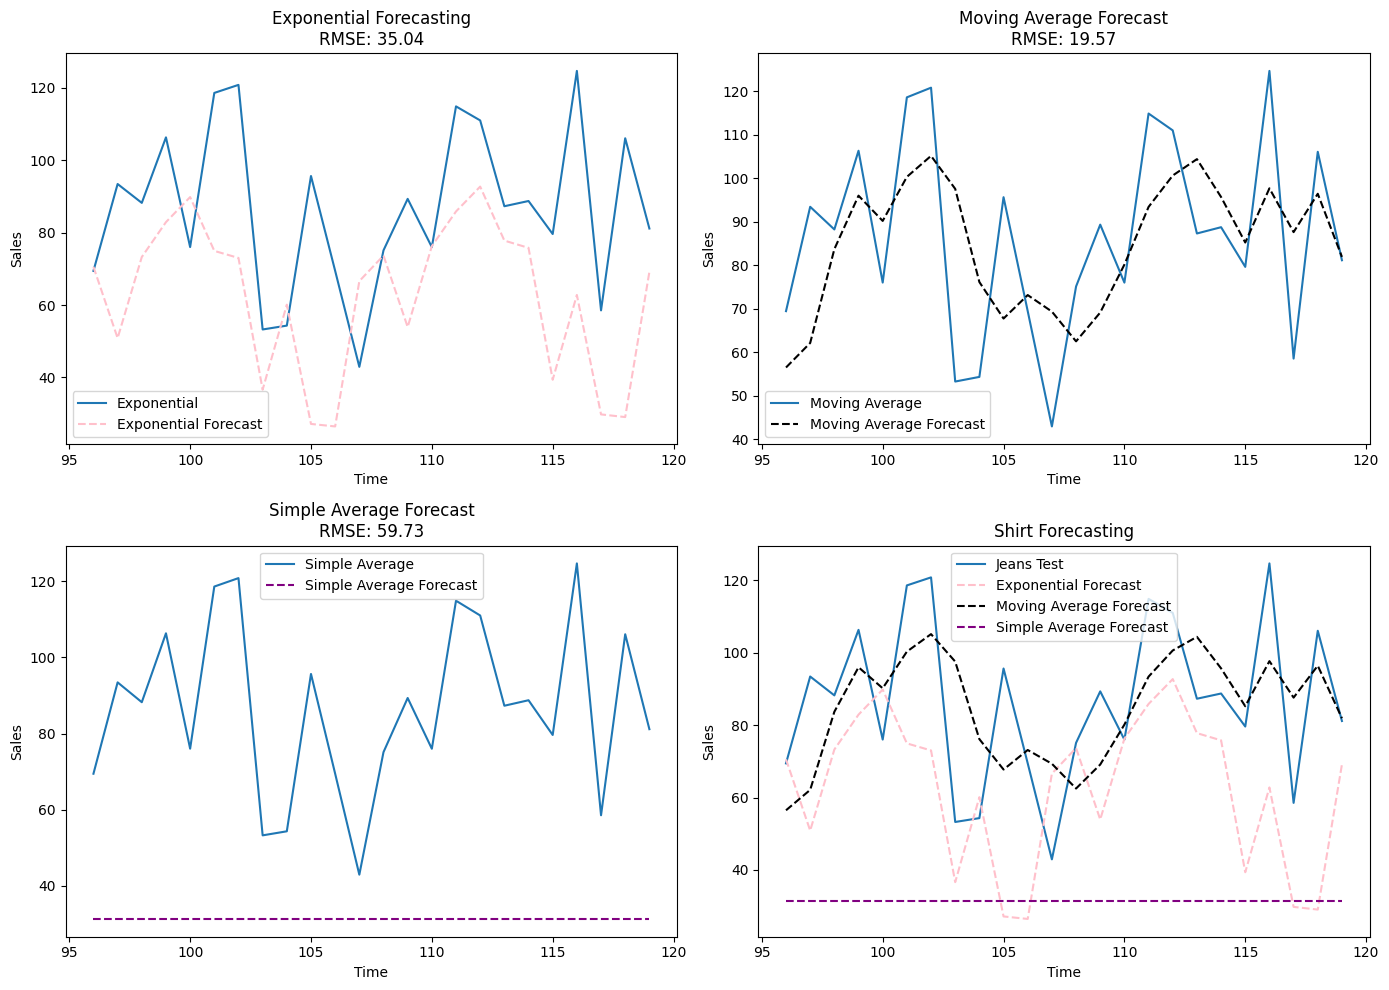

In [262]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test2_1.index, test2_1, label='Exponential')
axes[0, 0].plot(test2_1.index, forecast_values2, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE: {:.2f}'.format(rmse2_1))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Shirt
axes[0, 1].plot(test2_2.index, test2_2, label='Moving Average')
axes[0, 1].plot(test2_2.index, forecast_values_sma_2, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE: {:.2f}'.format(rmse2_2))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Jeans
axes[1, 0].plot(test2_3.index, test2_3, label='Simple Average')
axes[1, 0].plot(test2_3.index, forecast_values_simple_average_2, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Simple Average Forecast\nRMSE: {:.2f}'.format(rmse2_3))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test2_1.index, test2_1, label='Jeans Test')
axes[1, 1].plot(test2_1.index, forecast_values2, label='Exponential Forecast', linestyle='--', color='pink')
axes[1, 1].plot(test2_2.index, forecast_values_sma_2, label='Moving Average Forecast', linestyle='--', color='black')
axes[1, 1].plot(test2_3.index, forecast_values_simple_average_2, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 1].set_title('Shirt Forecasting')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Pant

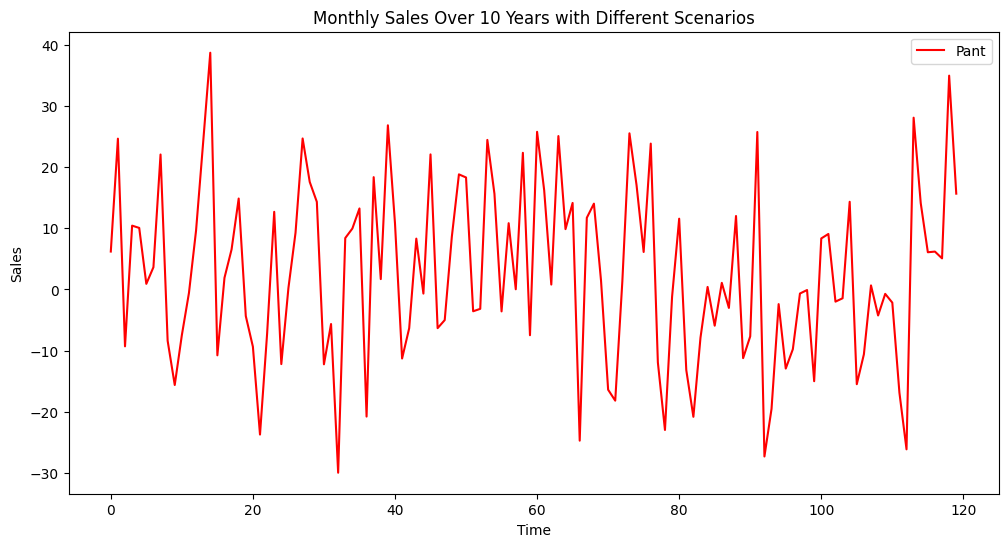

In [263]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Pant'], label='Pant',color='red')
plt.title('Monthly Sales Over 10 Years with Different Scenarios')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [264]:
pant_data = df['Pant']
result3 = seasonal_decompose(pant_data, model='additive', period=12)

### Original

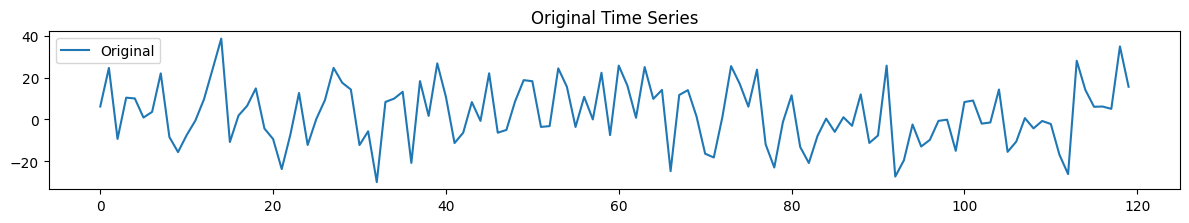

In [265]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(pant_data, label='Original')
plt.legend()
plt.title('Original Time Series')
plt.tight_layout()
plt.show()

### Trend

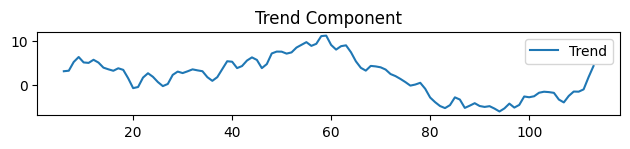

In [266]:
plt.subplot(4, 1, 2)
plt.plot(result3.trend, label='Trend')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.show()

### Seasonal

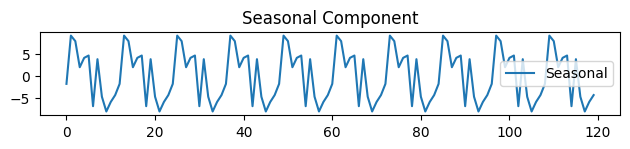

In [267]:
plt.subplot(4, 1, 3)
plt.plot(result3.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

### Noise

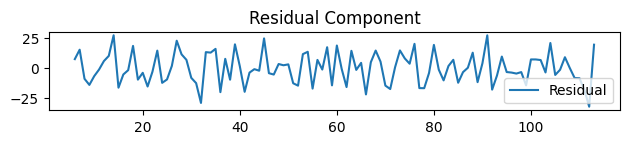

In [268]:
plt.subplot(4, 1, 4)
plt.plot(result3.resid, label='Residual')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

### Forecast Exponential Smoothing

In [269]:
train_size = int(len(pant_data) * 0.8)  # Use 80% of the data for training
train3_1, test3_1 = pant_data[:train_size], pant_data[train_size:]

In [270]:
model = ExponentialSmoothing(train3_1, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model = model.fit()

In [271]:
forecast_values3 = fit_model.forecast(steps=len(test3_1))

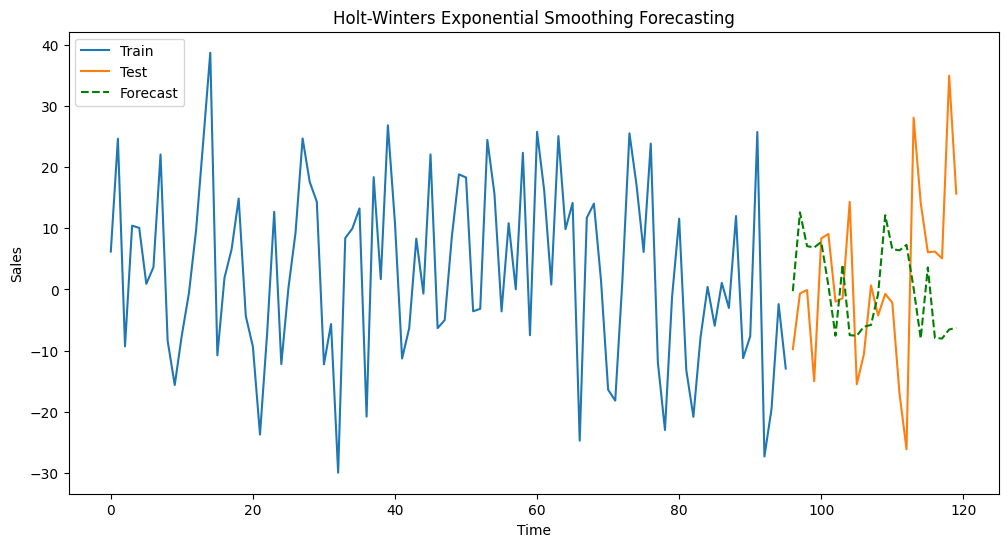

In [272]:
plt.figure(figsize=(12, 6))
plt.plot(train3_1.index, train3_1, label='Train')
plt.plot(test3_1.index, test3_1, label='Test')
plt.plot(test3_1.index, forecast_values3, label='Forecast', linestyle='--', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Error

In [273]:
# Calculate Mean Absolute Error (MAE)
mae3_1 = mean_absolute_error(test3_1, forecast_values3)
print(f"Mean Absolute Error (MAE): {mae3_1}")

# Calculate Mean Squared Error (MSE)
mse3_1 = mean_squared_error(test3_1, forecast_values3)
print(f"Mean Squared Error (MSE): {mse3_1}")

rmse3_1 = np.sqrt(mse3_1)
print(f"Root Mean Squared Error (RMSE): {rmse3_1}")

Mean Absolute Error (MAE): 14.079090084121267
Mean Squared Error (MSE): 304.39246837415885
Root Mean Squared Error (RMSE): 17.44684694648746


### Forecast Moving Average

In [274]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma = pant_data.rolling(window=window_size).mean()


In [275]:
train_size = int(len(pant_data) * 0.8)  # Use 80% of the data for training
train3_2, test3_2 = pant_data[:train_size], pant_data[train_size:]

In [276]:
window_size = 3  # Adjust the window size as needed
sma = pant_data.rolling(window=window_size).mean()
forecast_values_sma_3 = sma[train_size:]

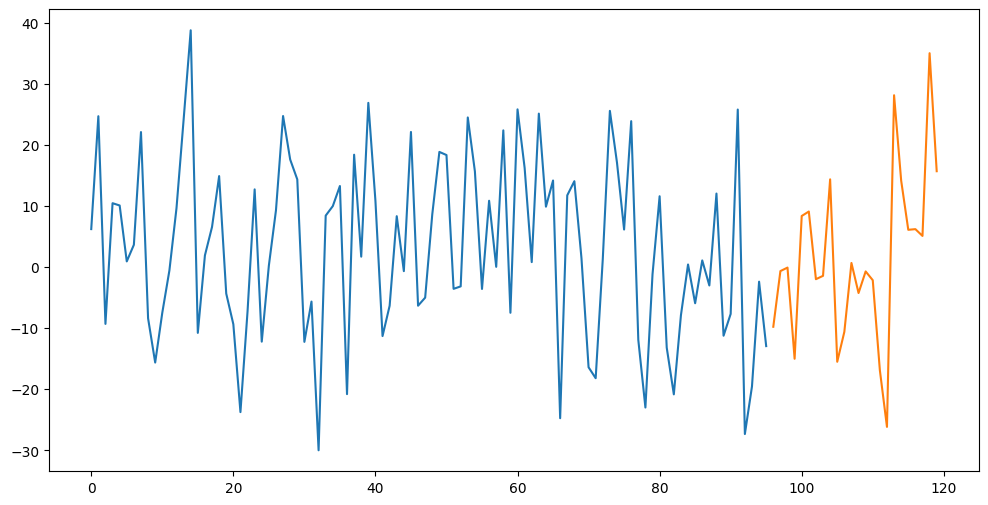

In [277]:
plt.figure(figsize=(12, 6))
plt.plot(train3_2.index, train3_2, label='Train')
plt.plot(test3_2.index, test3_2, label='Test')

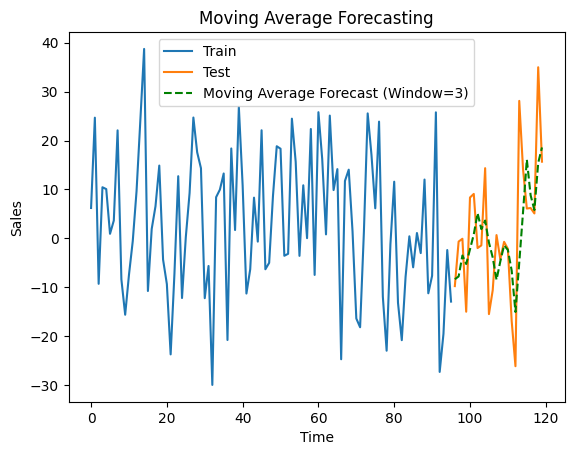

In [278]:

plt.plot(train3_2.index, train3_2, label='Train')
plt.plot(test3_2.index, test3_2, label='Test')
plt.plot(test3_2.index, forecast_values_sma_3, label=f'Moving Average Forecast (Window={window_size})', linestyle='--', color='green')

plt.title('Moving Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [279]:
# Calculate Mean Absolute Error (MAE)
mae3_2 = mean_absolute_error(test3_2, forecast_values_sma_3)
print(f"Mean Absolute Error (MAE): {mae3_2}")

# Calculate Mean Squared Error (MSE)
mse3_2 = mean_squared_error(test3_2, forecast_values_sma_3)
print(f"Mean Squared Error (MSE): {mse3_2}")

rmse3_2 = np.sqrt(mse3_2)
print(f"Root Mean Squared Error (RMSE): {rmse3_2}")

Mean Absolute Error (MAE): 8.030032758401623
Mean Squared Error (MSE): 115.04486160134388
Root Mean Squared Error (RMSE): 10.725896773759473


### Forecast Simple Average

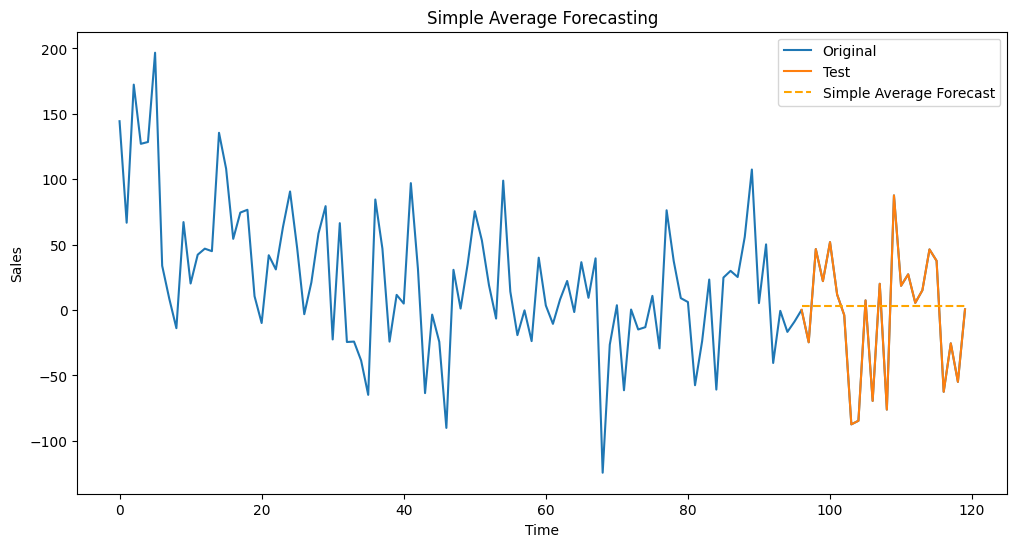

In [280]:
train_size = int(len(pant_data) * 0.8)  # Use 80% of the data for training
train3_3, test3_3= pant_data[:train_size], pant_data[train_size:]
# Calculate Simple Average
simple_average = train3_3.mean()

# Repeat the simple average for the length of the test set
forecast_values_simple_average_3 = pd.Series([simple_average] * len(test3_3), index=test3_3.index)

# Plot the original time series, test set, and Simple Average forecast
plt.figure(figsize=(12, 6))
plt.plot(shirt_data, label='Original')
plt.plot(test3_3.index, test1_3, label='Test')
plt.plot(test3_3.index, forecast_values_simple_average_3, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Simple Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Error

In [281]:
# Calculate Mean Absolute Error (MAE)
mae3_3 = mean_absolute_error(test3_3, forecast_values_simple_average_3)
print(f"Mean Absolute Error (MAE): {mae3_3}")

# Calculate Mean Squared Error (MSE)
mse3_3 = mean_squared_error(test3_3, forecast_values_simple_average_3)
print(f"Mean Squared Error (MSE): {mse3_3}")

rmse3_3 = np.sqrt(mse3_3)
print(f"Root Mean Squared Error (RMSE): {rmse3_3}")

Mean Absolute Error (MAE): 10.77037622445251
Mean Squared Error (MSE): 190.89939933230968
Root Mean Squared Error (RMSE): 13.816634877288669


### Graphs Representation

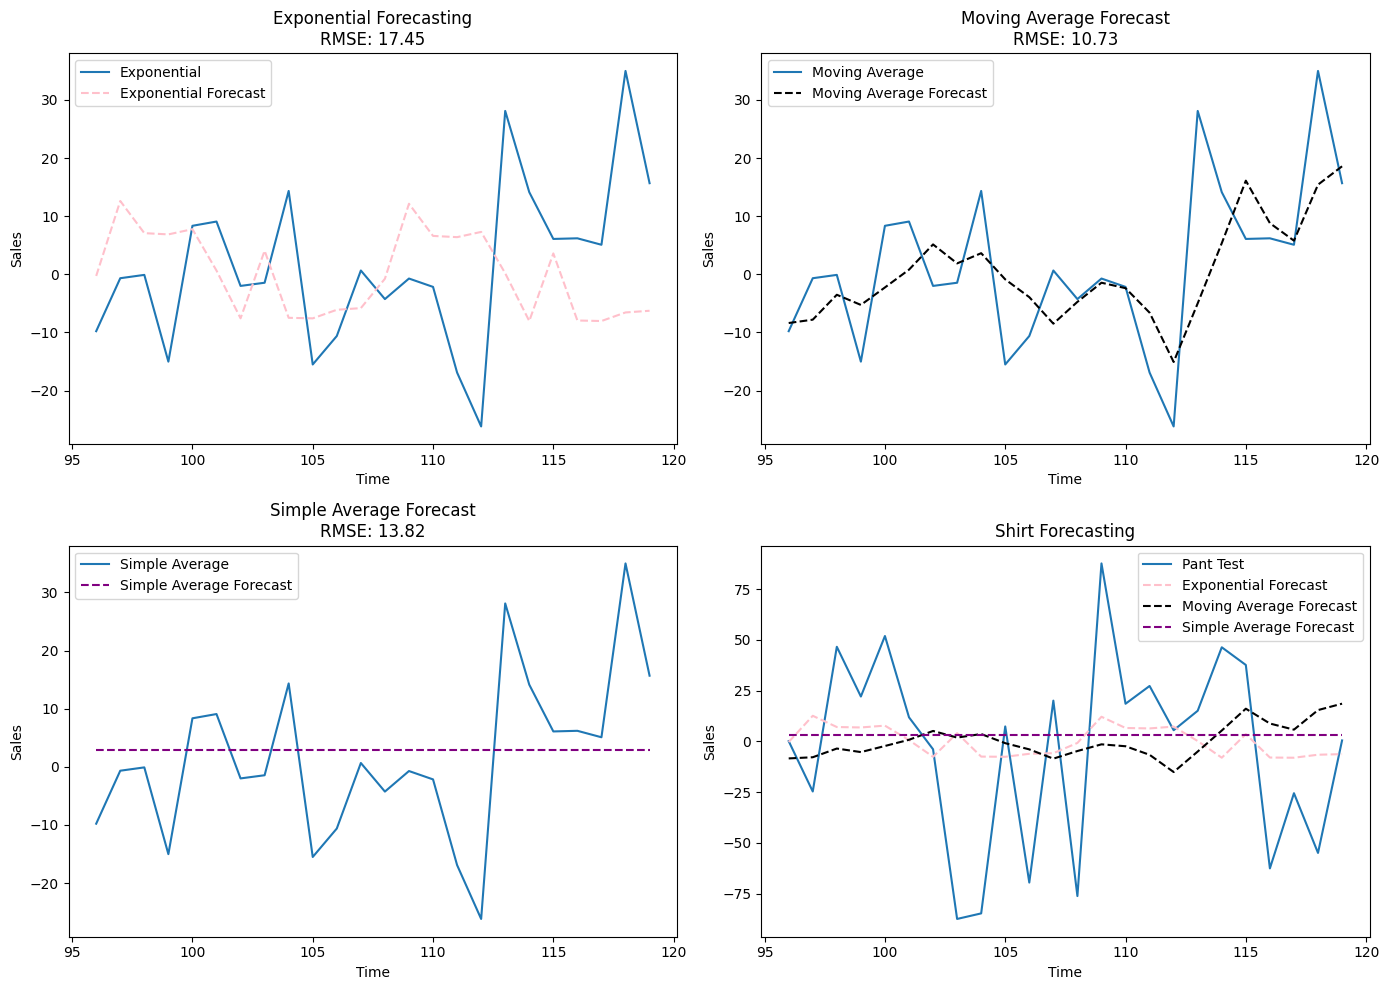

In [282]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test3_1.index, test3_1, label='Exponential')
axes[0, 0].plot(test3_1.index, forecast_values3, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE: {:.2f}'.format(rmse3_1))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Shirt
axes[0, 1].plot(test3_2.index, test3_2, label='Moving Average')
axes[0, 1].plot(test3_2.index, forecast_values_sma_3, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE: {:.2f}'.format(rmse3_2))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Jeans
axes[1, 0].plot(test3_3.index, test3_3, label='Simple Average')
axes[1, 0].plot(test3_3.index, forecast_values_simple_average_3, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Simple Average Forecast\nRMSE: {:.2f}'.format(rmse3_3))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test3_1.index, test1_1, label='Pant Test')
axes[1, 1].plot(test3_1.index, forecast_values3, label='Exponential Forecast', linestyle='--', color='pink')
axes[1, 1].plot(test3_2.index, forecast_values_sma_3, label='Moving Average Forecast', linestyle='--', color='black')
axes[1, 1].plot(test3_3.index, forecast_values_simple_average_3, label='Simple Average Forecast', linestyle='--', color='purple')
axes[1, 1].set_title('Shirt Forecasting')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Graph

### EXPONENTIAL FORECAST

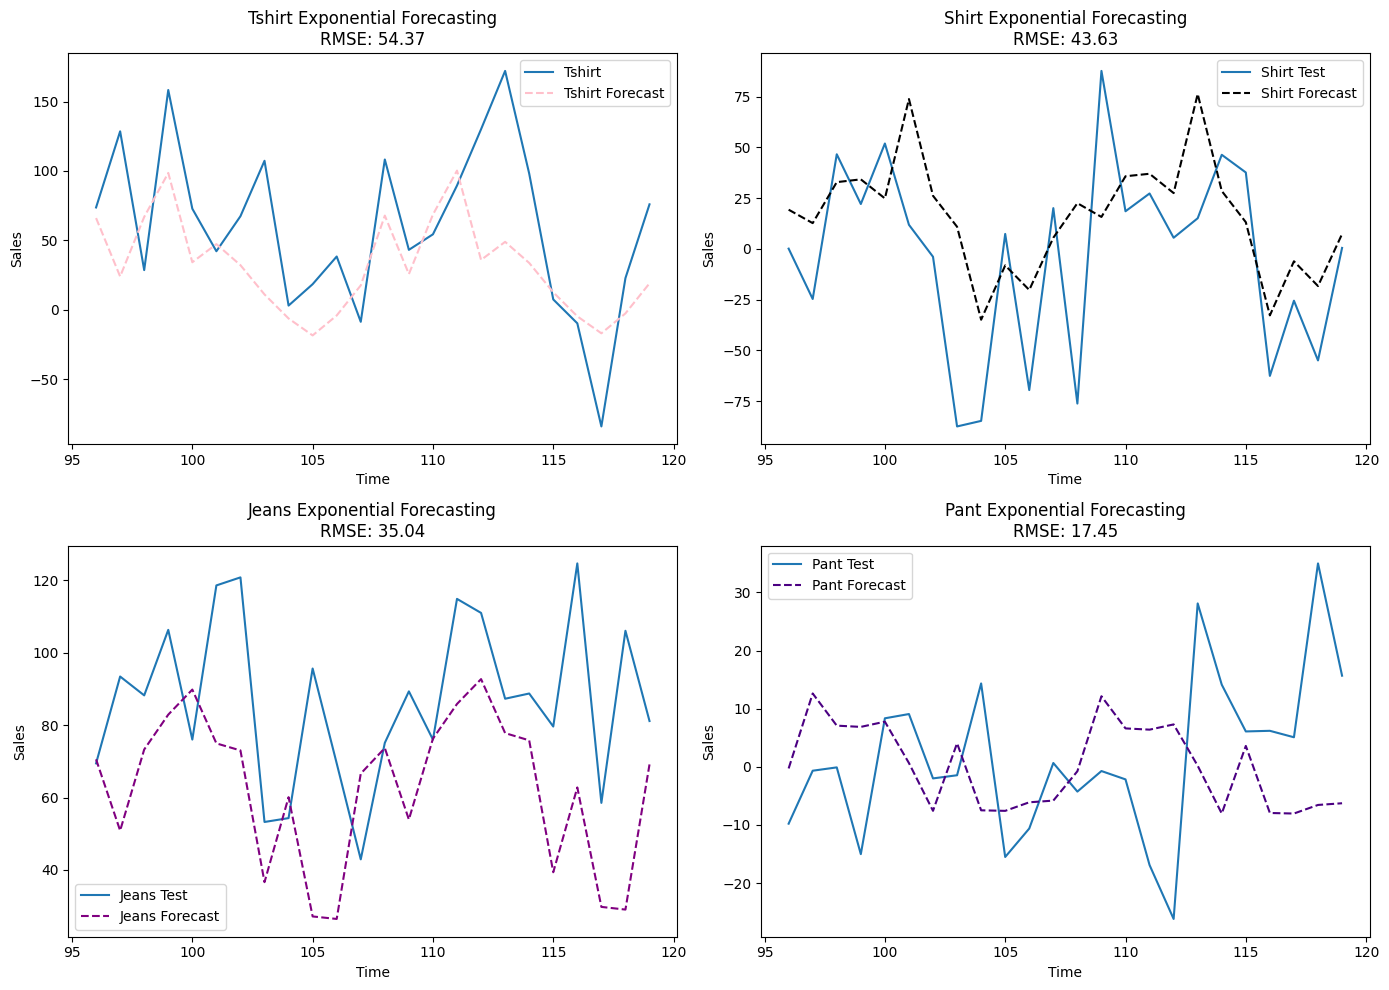

In [283]:

from math import sqrt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


# Plot for Tshirt
axes[0, 0].plot(test0_1.index, test0_1, label='Tshirt')
axes[0, 0].plot(test0_1.index, forecast_values, label='Tshirt Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Tshirt Exponential Forecasting\nRMSE: {:.2f}'.format(rmse0_1))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Shirt
axes[0, 1].plot(test1_1.index, test1_1, label='Shirt Test')
axes[0, 1].plot(test1_1.index, forecast_values1, label='Shirt Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Shirt Exponential Forecasting\nRMSE: {:.2f}'.format(rmse1_1))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Jeans
axes[1, 0].plot(test2_1.index, test2_1, label='Jeans Test')
axes[1, 0].plot(test2_1.index, forecast_values2, label='Jeans Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Jeans Exponential Forecasting\nRMSE: {:.2f}'.format(rmse2_1))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test3_1.index, test3_1, label='Pant Test')
axes[1, 1].plot(test3_1.index, forecast_values3, label='Pant Forecast', linestyle='--', color='indigo')
axes[1, 1].set_title('Pant Exponential Forecasting\nRMSE: {:.2f}'.format(rmse3_1))
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


### MOVING AVERAGE FORECAST

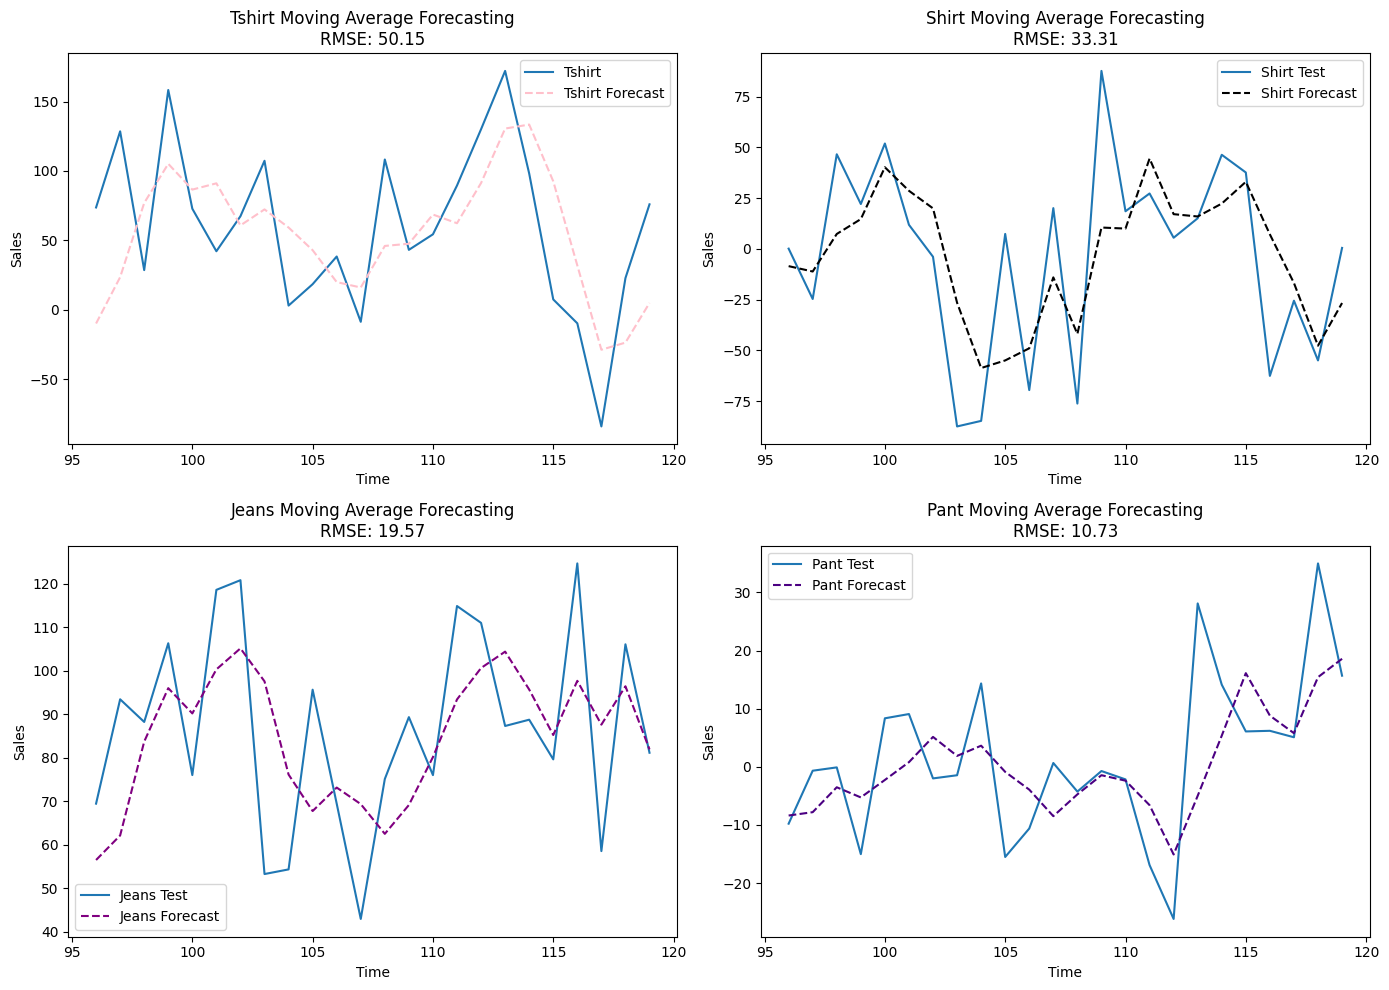

In [284]:

from math import sqrt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


# Plot for Tshirt
axes[0, 0].plot(test0_1.index, test0_1, label='Tshirt')
axes[0, 0].plot(test0_1.index, forecast_values_sma_0, label='Tshirt Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Tshirt Moving Average Forecasting\nRMSE: {:.2f}'.format(rmse0_2))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Shirt
axes[0, 1].plot(test1_1.index, test1_1, label='Shirt Test')
axes[0, 1].plot(test1_1.index, forecast_values_sma_1, label='Shirt Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Shirt Moving Average Forecasting\nRMSE: {:.2f}'.format(rmse1_2))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Jeans
axes[1, 0].plot(test2_1.index, test2_1, label='Jeans Test')
axes[1, 0].plot(test2_1.index, forecast_values_sma_2, label='Jeans Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Jeans Moving Average Forecasting\nRMSE: {:.2f}'.format(rmse2_2))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test3_1.index, test3_1, label='Pant Test')
axes[1, 1].plot(test3_1.index, forecast_values_sma_3, label='Pant Forecast', linestyle='--', color='indigo')
axes[1, 1].set_title('Pant Moving Average Forecasting\nRMSE: {:.2f}'.format(rmse3_2))
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


### SIMPLE AVERAGE FORECAST

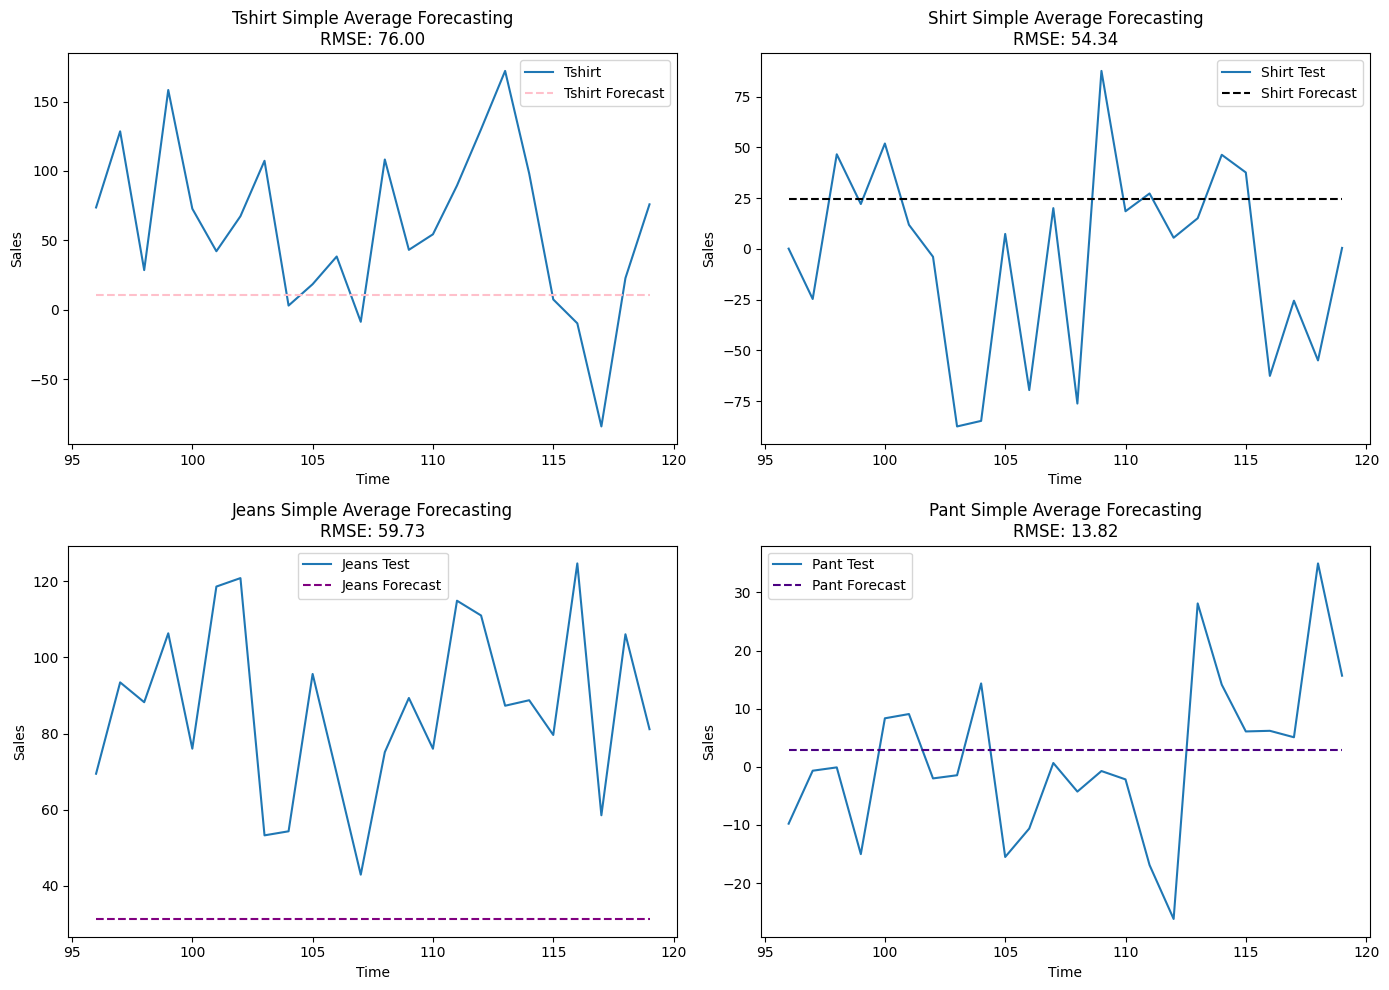

In [285]:

from math import sqrt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


# Plot for Tshirt
axes[0, 0].plot(test0_3.index, test0_3, label='Tshirt')
axes[0, 0].plot(test0_3.index, forecast_values_simple_average_0, label='Tshirt Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Tshirt Simple Average Forecasting\nRMSE: {:.2f}'.format(rmse0_3))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Shirt
axes[0, 1].plot(test1_3.index, test1_3, label='Shirt Test')
axes[0, 1].plot(test1_3.index, forecast_values_simple_average_1, label='Shirt Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Shirt Simple Average Forecasting\nRMSE: {:.2f}'.format(rmse1_3))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Jeans
axes[1, 0].plot(test2_3.index, test2_3, label='Jeans Test')
axes[1, 0].plot(test2_3.index, forecast_values_simple_average_2, label='Jeans Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('Jeans Simple Average Forecasting\nRMSE: {:.2f}'.format(rmse2_3))
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Pant
axes[1, 1].plot(test3_3.index, test3_3, label='Pant Test')
axes[1, 1].plot(test3_3.index, forecast_values_simple_average_3, label='Pant Forecast', linestyle='--', color='indigo')
axes[1, 1].set_title('Pant Simple Average Forecasting\nRMSE: {:.2f}'.format(rmse3_3))
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## BEST RMSE GRAPH TURNED OUT TO BE OF SIMPLE MOVING AVERAGE WITH LEAST RMSE AS COMPARED TO OTHER METHODS